# Bitcoin Difficulty Regression

## Data

In [72]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime

In [39]:
start_date = '2016-01-01'
# https://coinmetrics.io/data/btc.csv
diff = pd.read_csv("btc.csv", parse_dates=True, index_col="date")["averageDifficulty"][start_date:]
log_diff = np.log(diff)

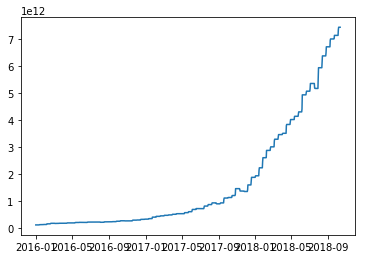

In [40]:
plt.plot(diff)
plt.show()

## Log regression

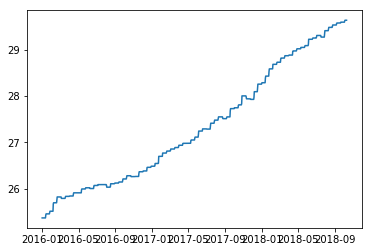

In [41]:
plt.plot(log_diff)
plt.show()

In [84]:
x = np.array(range(len(log_diff))).reshape(-1,1)
y = log_diff.values
reg = linear_model.LinearRegression().fit(x, y)

In [91]:
print("score regression:", reg.score(x,y))
print("slope:", reg.coef_[0])
print("intercept:", reg.intercept_)

score regression: 0.9750571879696043
slope: 0.004304014184612659
intercept: 25.159946915825547


## Prediction

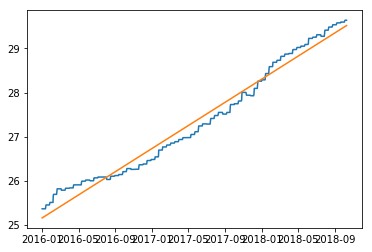

In [120]:
log_diff_pred = reg.predict(x)
plt.plot(log_diff.index, log_diff)
plt.plot(log_diff.index, log_diff_pred)
plt.show()

In [105]:
print("Monthly growth rate: %.2f"%(reg.coef_[0]*30*100)+"%")

Monthly growth rate: 12.91%
